In [10]:

import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np
import bs4

# get market info for ethereum
card_market_info = pd.read_html("https://coinmarketcap.com/currencies/cardano/historical-data/?start=20170605&end="+time.strftime("%Y%m%d"))[0]
card_market_live = pd.read_html("https://coinmarketcap.com/currencies/cardano/#charts")[0]
# convert the date string to the correct date format
card_market_info = card_market_info.assign(Date=pd.to_datetime(card_market_info['Date']))
card_market_info.loc[card_market_info['Volume'] < 0,'Volume']=0
card_market_info['Volume'] = card_market_info['Volume'].astype('int64')
# look at the first few rows
card_market_info.head()


,Date,Open*,High,Low,Close**,Volume,Market Cap
0,2018-06-09,0.205260,0.209668,0.202091,0.202091,51481400,5321790000
1,2018-06-08,0.210831,0.210841,0.202634,0.205358,68728600,5466230000
2,2018-06-07,0.216105,0.219351,0.209573,0.211119,76949400,5602970000
3,2018-06-06,0.220565,0.220862,0.210708,0.215721,84766300,5718610000
4,2018-06-05,0.214247,0.221728,0.204815,0.220467,119846000,5554790000


In [11]:
card_market_live

,#,Source,Pair,Volume (24h),Price,Volume (%),Updated
0,1,Binance,ADA/USDT,"$18,508,400",$0.188967,27.24%,Recently
1,2,Upbit,ADA/KRW,"$17,940,300",$0.195389,26.41%,Recently
2,3,Binance,ADA/BTC,"$17,730,500",$0.190578,26.10%,Recently
3,4,Huobi,ADA/USDT,"$5,481,110",$0.189751,8.07%,Recently
4,5,Binance,ADA/ETH,"$1,512,690",$0.190200,2.23%,Recently
5,6,Bittrex,ADA/BTC,"$1,278,820",$0.191236,1.88%,Recently
6,7,Huobi,ADA/BTC,"$1,009,860",$0.190798,1.49%,Recently
7,8,Gate.io,ADA/USDT,"$926,790",$0.200599,1.36%,Recently
8,9,Bittrex,ADA/USDT,"$679,227",$0.189959,1.00%,Recently
9,10,Upbit,ADA/BTC,"$588,112",$0.190725,0.87%,Recently


In [12]:
card_market_info.columns =[card_market_info.columns[0]]+['card_'+i for i in card_market_info.columns[1:]]
card_market_live.columns =[card_market_live.columns[0]]+['card_'+i for i in card_market_live.columns[1:]]

In [13]:

market_info = card_market_info
market_info = market_info[market_info['Date']>='2017-06-05']
for coins in ['card_']: 
    kwargs = { coins+'day_diff': lambda x: (x[coins+'Close**']-x[coins+'Open*'])/x[coins+'Open*']}
    market_info = market_info.assign(**kwargs)
market_info.head()

,Date,card_Open*,card_High,card_Low,card_Close**,card_Volume,card_Market Cap,card_day_diff
0,2018-06-09,0.205260,0.209668,0.202091,0.202091,51481400,5321790000,-0.015439
1,2018-06-08,0.210831,0.210841,0.202634,0.205358,68728600,5466230000,-0.025959
2,2018-06-07,0.216105,0.219351,0.209573,0.211119,76949400,5602970000,-0.023072
3,2018-06-06,0.220565,0.220862,0.210708,0.215721,84766300,5718610000,-0.021962
4,2018-06-05,0.214247,0.221728,0.204815,0.220467,119846000,5554790000,0.029032


In [38]:

mew = {'card_'+'close_off_high': lambda x: 2*(x['card_'+'High']- x['card_'+'Close**'])/(x['card_'+'High']-x['card_'+'Low'])-1,
       'card_'+'volatility': lambda x: (x['card_'+'High']- x['card_'+'Low'])/(x['card_'+'Open*'])}
card_market_live = card_market_live.assign(**mew)


KeyError: 'card_High'

In [14]:
for coins in ['card_']: 
    kwargs = { coins+'close_off_high': lambda x: 2*(x[coins+'High']- x[coins+'Close**'])/(x[coins+'High']-x[coins+'Low'])-1,
        coins+'volatility': lambda x: (x[coins+'High']- x[coins+'Low'])/(x[coins+'Open*'])}
    market_info = market_info.assign(**kwargs)
   

NameError: name 'market_info_live' is not defined

In [80]:
model_data = market_info[['Date']+[coin+metric for coin in ['card_'] 
                                   for metric in ['Close**','Volume','close_off_high','volatility']]]
# need to reverse the data frame so that subsequent rows represent later timepoints
model_data = model_data.sort_values(by='Date')
model_data.head()

model_data

,Date,card_Close**,card_Volume,card_close_off_high,card_volatility
250,2017-10-01,0.024969,50068700,-0.024072,0.686041
249,2017-10-02,0.025932,57641300,-0.178575,0.411224
248,2017-10-03,0.020816,16997800,0.962584,0.261482
247,2017-10-04,0.021931,9000050,-0.098867,0.093079
246,2017-10-05,0.021489,5562510,0.027027,0.058995
245,2017-10-06,0.018539,7780710,0.887492,0.148977
244,2017-10-07,0.020941,7411240,-0.936443,0.186271
243,2017-10-08,0.020477,7727460,0.808751,0.164891
242,2017-10-09,0.022114,4663310,-0.437728,0.121166
241,2017-10-10,0.021531,2725600,0.568123,0.052777


In [94]:
split_date = '2018-03-07'

# we don't need the date columns anymore
training_set, test_set = model_data[model_data['Date']<split_date], model_data[model_data['Date']>=split_date]
training_set = training_set.drop('Date', 1)
test_set = test_set.drop('Date', 1)


test_set


,card_Close**,card_Volume,card_close_off_high,card_volatility
93,0.247281,190793000,0.570527,0.180354
92,0.221743,167809000,0.963158,0.133877
91,0.222207,246849000,-0.825403,0.150534
90,0.209873,129138000,0.885417,0.078587
89,0.223498,161362000,-0.737804,0.139085
88,0.223722,184250000,0.540027,0.078928
87,0.223026,98868700,-0.109430,0.061602
86,0.199562,144156000,0.808465,0.166236
85,0.185709,204233000,0.091945,0.146542
84,0.178878,97455300,0.348564,0.062804


In [88]:
window_len = 10
norm_cols = ['card_Close**','card_Volume']

In [96]:
LSTM_training_inputs = []
for i in range(len(training_set)-window_len):
    temp_set = training_set[i:(i+window_len)].copy()
    for col in norm_cols:
        temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0]-1
    LSTM_training_inputs.append(temp_set+1)
LSTM_training_outputs = (training_set['card_Close**'][window_len:].values/training_set['card_Close**'][:-window_len].values)-1

In [110]:

LSTM_test_inputs = []
for i in range(len(test_set)-window_len):
    temp_set = test_set[i:(i+window_len)].copy()
    for col in norm_cols:
        temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0]-1
    LSTM_test_inputs.append(temp_set)
    
LSTM_test_outputs = (test_set['card_Close**'][window_len:].values/test_set['card_Close**'][:-window_len].values)-1

In [91]:
# I find it easier to work with numpy arrays rather than pandas dataframes
# especially as we now only have numerical data
LSTM_training_inputs = [np.array(LSTM_training_input) for LSTM_training_input in LSTM_training_inputs]
LSTM_training_inputs = np.array(LSTM_training_inputs)

LSTM_test_inputs = [np.array(LSTM_test_inputs) for LSTM_test_inputs in LSTM_test_inputs]
LSTM_test_inputs = np.array(LSTM_test_inputs)

In [92]:

# import the relevant Keras modules# import 
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout

def build_model(inputs, output_size, neurons, activ_func="linear",
                dropout=0.15, loss="mae", optimizer="adam"):
    model = Sequential()

    model.add(LSTM(20, input_shape=(inputs.shape[1],4)))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model

In [93]:
# random seed for reproducibility
np.random.seed(202)
# initialise model architecture
card_model = build_model(LSTM_training_inputs, output_size=1, neurons = 30)
# model output is next price normalised to 10th previous closing price
LSTM_training_outputs = (training_set['card_Close**'][window_len:].values/training_set['card_Close**'][:-window_len].values)-1
# train model on data
# note: card_history contains information on the training error per epoch
card_history = card_model.fit(LSTM_training_inputs, LSTM_training_outputs, 
                            epochs=50, batch_size=2, verbose=2, shuffle=True)

Epoch 1/50
 - 2s - loss: 0.5350
Epoch 2/50
 - 1s - loss: 0.3724
Epoch 3/50
 - 0s - loss: 0.2889
Epoch 4/50
 - 1s - loss: 0.2221
Epoch 5/50
 - 1s - loss: 0.2052
Epoch 6/50
 - 1s - loss: 0.2091
Epoch 7/50
 - 1s - loss: 0.1876
Epoch 8/50
 - 1s - loss: 0.1813
Epoch 9/50
 - 1s - loss: 0.1947
Epoch 10/50
 - 1s - loss: 0.1639
Epoch 11/50
 - 1s - loss: 0.1747
Epoch 12/50
 - 0s - loss: 0.1585
Epoch 13/50
 - 1s - loss: 0.1773
Epoch 14/50
 - 1s - loss: 0.1631
Epoch 15/50
 - 1s - loss: 0.1615
Epoch 16/50
 - 0s - loss: 0.1631
Epoch 17/50
 - 0s - loss: 0.1654
Epoch 18/50
 - 0s - loss: 0.1595
Epoch 19/50
 - 0s - loss: 0.1499
Epoch 20/50
 - 1s - loss: 0.1509
Epoch 21/50
 - 0s - loss: 0.1652
Epoch 22/50
 - 0s - loss: 0.1383
Epoch 23/50
 - 1s - loss: 0.1531
Epoch 24/50
 - 0s - loss: 0.1554
Epoch 25/50
 - 1s - loss: 0.1501
Epoch 26/50
 - 1s - loss: 0.1450
Epoch 27/50
 - 1s - loss: 0.1381
Epoch 28/50
 - 1s - loss: 0.1418
Epoch 29/50
 - 1s - loss: 0.1494
Epoch 30/50
 - 1s - loss: 0.1531
Epoch 31/50
 - 1s -

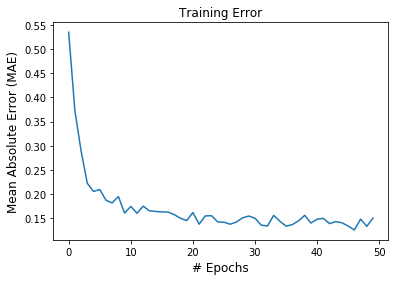

In [72]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(card_history.epoch, card_history.history['loss'])
ax1.set_title('Training Error')

if card_model.loss == 'mae':
    ax1.set_ylabel('Mean Absolute Error (MAE)',fontsize=12)
# just in case you decided to change the model loss calculation
else:
    ax1.set_ylabel('Model Loss',fontsize=12)
ax1.set_xlabel('# Epochs',fontsize=12)
plt.show()

In [73]:
# random seed for reproducibility
np.random.seed(202)
# we'll try to predict the closing price for the next 5 days 
# change this value if you want to make longer/shorter prediction
pred_range = 1
# initialise model architecture
card_model = build_model(LSTM_test_inputs, output_size=pred_range, neurons = 20)
# model output is next 1 price normalised to 10th previous closing price
LSTM_training_outputs = []
for i in range(window_len, len(training_set['card_Close**'])-pred_range):
    LSTM_training_outputs.append((training_set['card_Close**'][i:i+pred_range].values/
                                  training_set['card_Close**'].values[i-window_len])-1)
LSTM_training_outputs = np.array(LSTM_training_outputs)
# train model on data
# note: card_history contains information on the training error per epoch
card_history = card_model.fit(LSTM_training_inputs[:-pred_range], LSTM_training_outputs, 
                            epochs=50, batch_size=1, verbose=2, shuffle=True)


Epoch 1/50
 - 2s - loss: 0.4927
Epoch 2/50
 - 1s - loss: 0.2960
Epoch 3/50
 - 1s - loss: 0.2288
Epoch 4/50
 - 1s - loss: 0.1980
Epoch 5/50
 - 1s - loss: 0.1950
Epoch 6/50
 - 1s - loss: 0.1890
Epoch 7/50
 - 1s - loss: 0.1850
Epoch 8/50
 - 1s - loss: 0.1858
Epoch 9/50
 - 1s - loss: 0.1621
Epoch 10/50
 - 1s - loss: 0.1788
Epoch 11/50
 - 1s - loss: 0.1773
Epoch 12/50
 - 1s - loss: 0.1780
Epoch 13/50
 - 1s - loss: 0.1456
Epoch 14/50
 - 1s - loss: 0.1667
Epoch 15/50
 - 1s - loss: 0.1488
Epoch 16/50
 - 1s - loss: 0.1569
Epoch 17/50
 - 1s - loss: 0.1534
Epoch 18/50
 - 1s - loss: 0.1400
Epoch 19/50
 - 1s - loss: 0.1512
Epoch 20/50
 - 1s - loss: 0.1495
Epoch 21/50
 - 1s - loss: 0.1446
Epoch 22/50
 - 1s - loss: 0.1521
Epoch 23/50
 - 1s - loss: 0.1462
Epoch 24/50
 - 1s - loss: 0.1541
Epoch 25/50
 - 1s - loss: 0.1475
Epoch 26/50
 - 1s - loss: 0.1545
Epoch 27/50
 - 1s - loss: 0.1499
Epoch 28/50
 - 1s - loss: 0.1331
Epoch 29/50
 - 1s - loss: 0.1333
Epoch 30/50
 - 1s - loss: 0.1275
Epoch 31/50
 - 1s -

In [74]:
# little bit of reformatting the predictions to closing prices
card_pred_prices = ((card_model.predict(LSTM_test_inputs)[:-pred_range][::pred_range]+1)*\
                   test_set['card_Close**'].values[:-(window_len + pred_range)][::1].reshape(int(np.ceil((len(LSTM_test_inputs)-pred_range)/float(pred_range))),1))


In [75]:
card_pred_prices

array([[0.19315496],
       [0.17558234],
       [0.17297438],
       [0.19057234],
       [0.19985811],
       [0.19671979],
       [0.1752126 ],
       [0.17884008],
       [0.17991733],
       [0.17801897],
       [0.16327599],
       [0.15695236],
       [0.17000758],
       [0.16266873],
       [0.16429632],
       [0.1665082 ],
       [0.15742876],
       [0.16205538],
       [0.16324495],
       [0.14627587],
       [0.1413273 ],
       [0.13841586],
       [0.14595144],
       [0.15635244],
       [0.15004306],
       [0.15954252],
       [0.17524121],
       [0.22840093],
       [0.19122719],
       [0.18662757],
       [0.21137807],
       [0.40074834],
       [0.286279  ],
       [0.23803377],
       [0.259019  ],
       [0.29413931],
       [0.29222153],
       [0.25535048],
       [0.25735778],
       [0.29286402],
       [0.26852401],
       [0.29997469],
       [0.24749632],
       [0.32470837],
       [0.33363402],
       [0.31741545],
       [0.34192898],
       [0.355

In [78]:
LSTM_test_inputs[83]

array([[ 0.        ,  0.        , -0.67911872,  0.1970993 ],
       [ 0.03914071,  0.20211249, -0.18284934,  0.08267177],
       [ 0.10839116,  0.09121738, -0.59391246,  0.11336879],
       [ 0.09506865, -0.29509029,  0.09199444,  0.05446415],
       [ 0.12083272, -0.37124698, -0.65224998,  0.04620096],
       [ 0.12286038, -0.36707275,  0.47848493,  0.05113307],
       [ 0.0532605 , -0.375729  ,  0.81814342,  0.08300497],
       [ 0.08502879, -0.35282746, -0.85088394,  0.0789416 ],
       [ 0.06167134, -0.54225905,  0.01260587,  0.04603632],
       [ 0.03902259, -0.58447058,  0.68377991,  0.04524652]])

In [95]:
card_pred_prices.reshape[83,1]

TypeError: 'builtin_function_or_method' object is not subscriptable